In [1]:
import joblib
from matplotlib import pyplot as plt

model=joblib.load('KMeans_model.sav')
tumorLabel=5

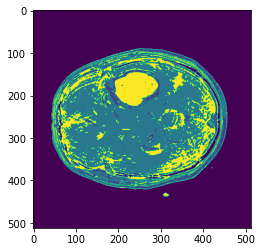

In [2]:
import cv2

img=cv2.imread('test_images/0 (237).jpg',0)
img_original=cv2.imread('test_images/0 (237).jpg')
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
labels=model.predict(imgFlatten)
labels2D=labels.reshape(height,width)
mask=(labels2D==tumorLabel)
plt.imshow(labels2D)

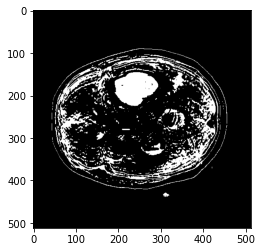

In [3]:
plt.imshow(mask,cmap='gray')

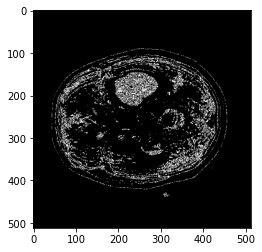

In [4]:
import numpy as np

tumorExtracted=np.bitwise_and(mask,img)
plt.imshow(tumorExtracted,cmap='gray')

In [5]:
contours,hiearachy=cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no. of contours: ',len(contours))

for index,cnt in enumerate(contours):
    area=cv2.contourArea(cnt)
    if(area>1400):
        cv2.drawContours(img_original,[cnt],-1,(0,255,255),2)
        x,y,w,h=cv2.boundingRect(cnt)
        cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_original,(x,y),(x+120,y-40),(0,255,0),-1) #-1 implies a filled rectangle
        cv2.putText(img_original,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
cv2.imshow('LIVE',img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

no. of contours:  2586


In [6]:
import os
import cv2

test_img_path='test_images'
test_img_names=os.listdir(test_img_path)

for test_img_name in test_img_names:
    img_path=os.path.join(test_img_path,test_img_name)
    img=cv2.imread(img_path,0)
    height,width=img.shape
    imgFlatten=img.reshape(height*width,1)
    labels=model.predict(imgFlatten)
    labels2D=labels.reshape(height,width)
    mask=(labels2D==tumorLabel)